In [2]:
#import necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
# download data and upload it onto your drive and create a mount to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [5]:
#the path shown here might differ from individual to individual
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


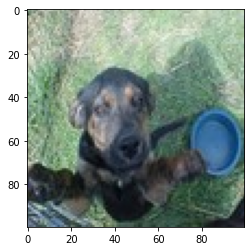

In [9]:
#use a random value to get the corresponding image in the dataset
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
#fitting the model over an over again would aggregate to previous accuracy value if you don't run compile every single time
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 20s 630ms/step - loss: 0.4169 - accuracy: 0.8050
Epoch 2/5
32/32 [==============================] - 20s 630ms/step - loss: 0.3807 - accuracy: 0.8315
Epoch 3/5
32/32 [==============================] - 20s 635ms/step - loss: 0.3128 - accuracy: 0.8755
Epoch 4/5
32/32 [==============================] - 20s 632ms/step - loss: 0.2911 - accuracy: 0.8835
Epoch 5/5
32/32 [==============================] - 23s 709ms/step - loss: 0.2127 - accuracy: 0.9200


In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 83ms/step - loss: 0.6055 - accuracy: 0.6625


[0.6055486798286438, 0.6625000238418579]

# Making predictions using Gradio

In [16]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 4.5 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 212 kB 68.6 MB/s 
     |████████████████████████████████| 1.1 MB 69.7 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 140 kB 73.0 MB/s 
     |████████████████████████████████| 2.3 MB 53.5 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 272 kB 41.3 MB/s 
     |████████████████████████████████| 271 kB 77.0 MB/s 
     |████████████████████████████████| 144 kB 11.9 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 

In [ ]:
import gradio as gr
def img_inp(i):


  y_pred = model.predict(X_test[int(i), :].reshape(1, 100, 100, 3))
  y_pred = y_pred > 0.5

  if(y_pred == 0):
    pred = 'dog'
  else:
    pred = 'cat'
    
  return [X_test[int(i), :],"It is a: "+ pred]

im=gr.Interface(img_inp,inputs="text",outputs=["image","text"])
im.launch(debug=True)

In [28]:
drive.flush_and_unmount()